In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
LEARNING_SCHEME = ['fixedlr', 'nesterovlr', 'differentiallr', 'gradunfreeze', 'fixedlr_triangle_schedule']
SEGMENTS = ['batch', 'epoch']

LEARNING_SCHEME_LOOKUP = dict(zip(LEARNING_SCHEME, ['Fixed', 'Nesterov', 'Differential', 'Gradual Unfreezing', 'Fixed with Triangle Scheduler']))

BATCH_DATA = []
EPOCH_DATA = []

for lr in LEARNING_SCHEME:
    for seg in SEGMENTS:
        print(f'Loading {lr} {seg} metrics...')
        if lr == 'fixedlr_triangle_schedule':
            df_adapter = pd.read_csv(f'../outputs/bert-base-uncased_sst2_epochs5_minibatch32_logging25_fixedlr_lr01_adapter_trianglescheduler_{seg}_history.csv')
            df_no_adapter = pd.read_csv(f'../outputs/bert-base-uncased_sst2_epochs5_minibatch32_logging25_fixedlr_lr01_trianglescheduler_{seg}_history.csv')
        else:
            df_adapter = pd.read_csv(f'../outputs/bert-base-uncased_sst2_epochs5_minibatch32_logging25_{lr}_lr01_adapter_{seg}_history.csv')
            df_no_adapter = pd.read_csv(f'../outputs/bert-base-uncased_sst2_epochs5_minibatch32_logging25_{lr}_lr01_{seg}_history.csv')
        
        df_adapter['learning scheme'] = LEARNING_SCHEME_LOOKUP[lr]
        df_adapter['adapter'] = 'With Adapter'

        df_no_adapter['learning scheme'] = LEARNING_SCHEME_LOOKUP[lr]
        df_no_adapter['adapter'] = 'Without Adapter'
        
        if seg == 'batch':
            BATCH_DATA.append(df_adapter)
            BATCH_DATA.append(df_no_adapter)
        else:
            EPOCH_DATA.append(df_adapter)
            EPOCH_DATA.append(df_no_adapter)

Loading fixedlr batch metrics...
Loading fixedlr epoch metrics...
Loading nesterovlr batch metrics...
Loading nesterovlr epoch metrics...
Loading differentiallr batch metrics...
Loading differentiallr epoch metrics...
Loading gradunfreeze batch metrics...
Loading gradunfreeze epoch metrics...
Loading fixedlr_triangle_schedule batch metrics...
Loading fixedlr_triangle_schedule epoch metrics...


In [3]:
df_sst_batch_data = pd.concat(BATCH_DATA, ignore_index=True)
print(df_sst_batch_data.shape)
df_sst_batch_data['cumulative batch'] = df_sst_batch_data['epoch'] * df_sst_batch_data['batch']
df_sst_batch_data.head()

(4210, 10)


,epoch,batch,train loss,train accuracy,validation loss,validation accuracy,batch time,name,learning scheme,adapter,cumulative batch
0,0,0,0.689953,0.55545,0.714475,0.511468,0.000000,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter,0
1,1,25,0.708110,0.51375,0.695722,0.488532,1.960699,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter,25
2,1,50,0.685634,0.54375,0.685051,0.551605,1.967098,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter,50
3,1,75,0.688537,0.55250,0.697410,0.509174,1.955778,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter,75
4,1,100,0.677489,0.57000,0.770871,0.509174,1.958235,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter,100


In [4]:
df_sst_epoch_data = pd.concat(EPOCH_DATA, ignore_index=True)
print(df_sst_epoch_data.shape)
df_sst_epoch_data.head()

(60, 9)


,epoch,train loss,train accuracy,validation loss,validation accuracy,epoch time,name,learning scheme,adapter
0,0,0.689953,0.555450,0.714475,0.511468,0.000000,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter
1,1,0.310597,0.870124,0.303227,0.871560,242.053413,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter
2,2,0.262003,0.891372,0.279996,0.878440,242.200277,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter
3,3,0.238850,0.901884,0.250626,0.897936,241.855015,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter
4,4,0.235088,0.903503,0.274508,0.879587,242.627877,bert-base-uncased_sst2_epochs5_minibatch32_log...,Fixed,With Adapter


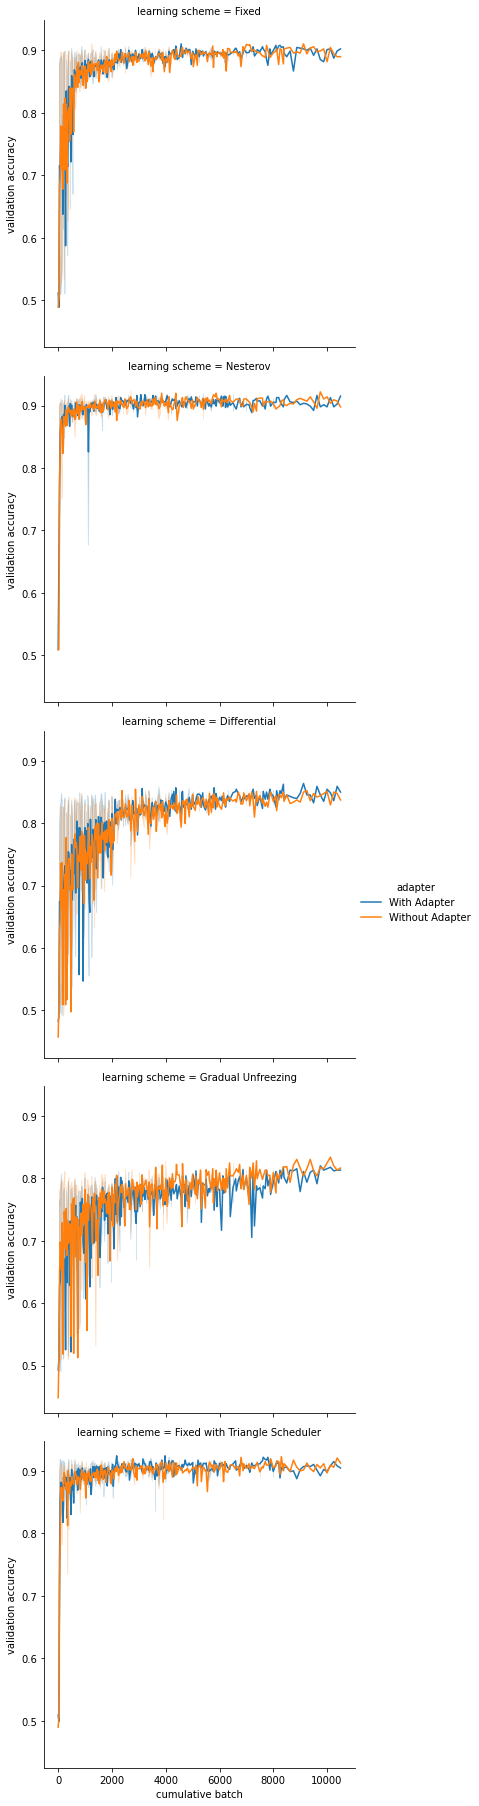

In [5]:
sns.relplot(data=df_sst_batch_data, x='cumulative batch', y='validation accuracy', hue='adapter', row='learning scheme', kind='line')

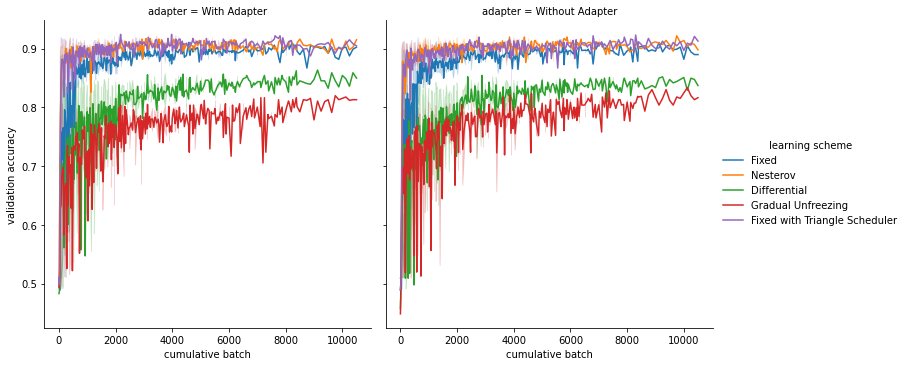

In [6]:
sns.relplot(data=df_sst_batch_data, x='cumulative batch', y='validation accuracy', hue='learning scheme', col='adapter', kind='line')

Text(0.5, 1.0, 'Batch execution time per Learning Scheme with/without Adapters')

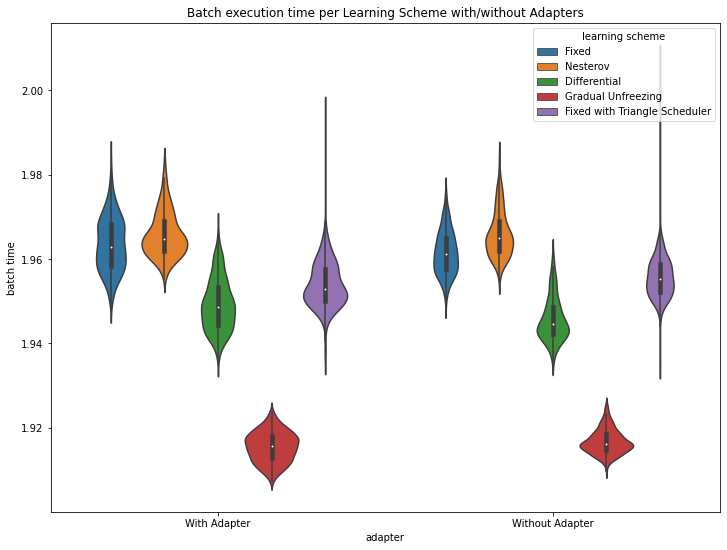

In [10]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(data=df_sst_batch_data[df_sst_batch_data['batch time'] > 0], x='adapter', y='batch time', hue='learning scheme')
plt.title('Batch execution time per Learning Scheme with/without Adapters')

Text(0.5, 1.0, 'Batch execution time per Learning Scheme with/without Adapters')

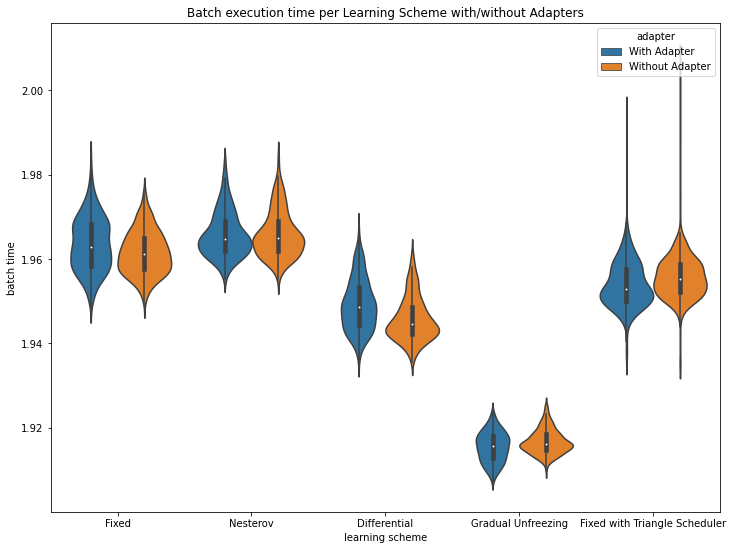

In [11]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(data=df_sst_batch_data[df_sst_batch_data['batch time'] > 0], x='learning scheme', y='batch time', hue='adapter')
plt.title('Batch execution time per Learning Scheme with/without Adapters')

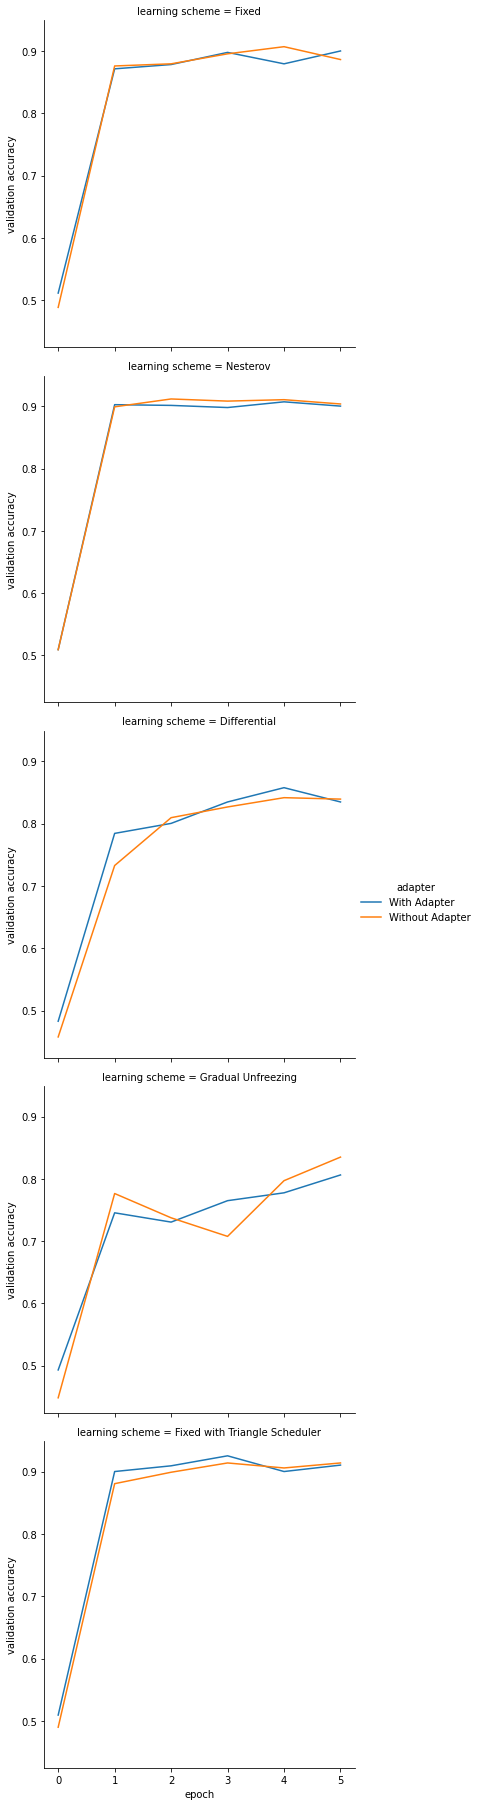

In [12]:
sns.relplot(data=df_sst_epoch_data, x='epoch', y='validation accuracy', hue='adapter', row='learning scheme', kind='line')

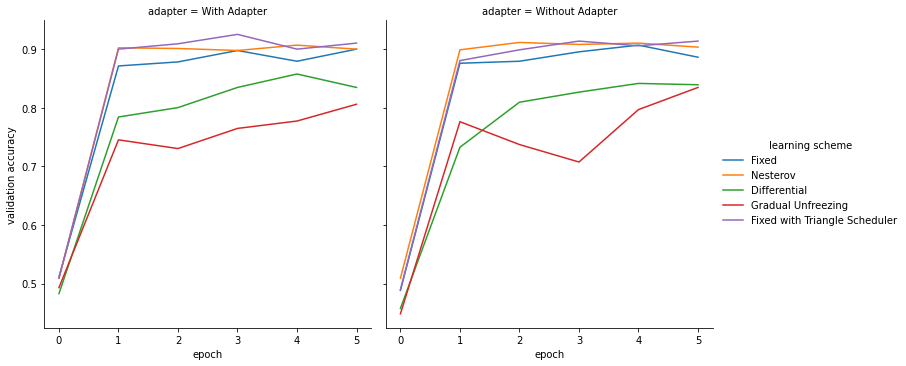

In [13]:
sns.relplot(data=df_sst_epoch_data, x='epoch', y='validation accuracy', hue='learning scheme', col='adapter', kind='line')

Text(0.5, 1.0, 'Epoch execution time per Learning Scheme with/without Adapters')

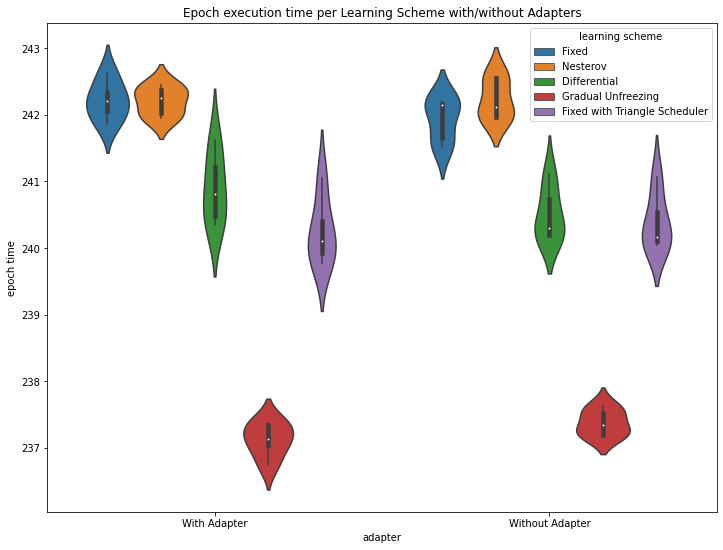

In [14]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(data=df_sst_epoch_data[df_sst_epoch_data['epoch time'] > 0], x='adapter', y='epoch time', hue='learning scheme')
plt.title('Epoch execution time per Learning Scheme with/without Adapters')

Text(0.5, 1.0, 'Epoch execution time per Learning Scheme with/without Adapters')

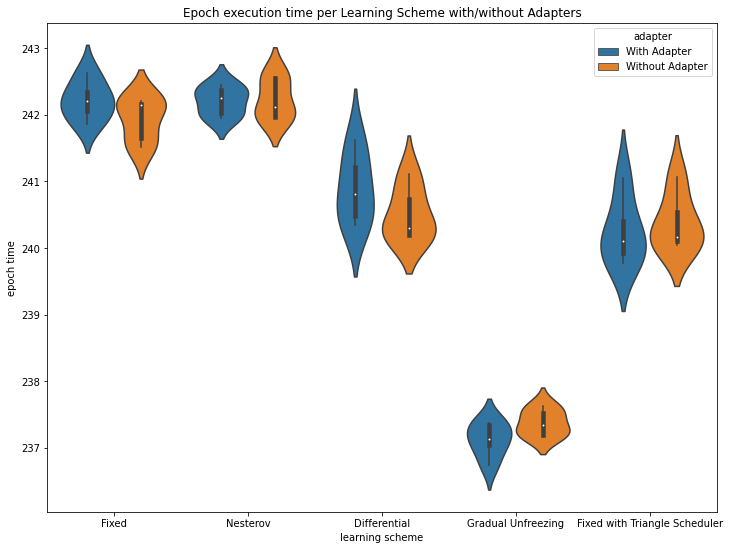

In [15]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(data=df_sst_epoch_data[df_sst_epoch_data['epoch time'] > 0], x='learning scheme', y='epoch time', hue='adapter')
plt.title('Epoch execution time per Learning Scheme with/without Adapters')

In [16]:
LEARNING_SCHEME = ['fixedlr', 'nesterovlr', 'differentiallr', 'gradualunfreeze', 'fixedlr_triangle_schedule']
SEGMENTS = ['batch', 'epoch']

LEARNING_SCHEME_LOOKUP = dict(zip(LEARNING_SCHEME, ['Fixed', 'Nesterov', 'Differential', 'Gradual Unfreezing', 'Fixed with Triangle Scheduler']))

BATCH_DATA = []
EPOCH_DATA = []

for lr in LEARNING_SCHEME:
    for seg in SEGMENTS:
        print(f'Loading {lr} {seg} metrics...')
        if lr == 'fixedlr_triangle_schedule':
            df_adapter = pd.read_csv(f'../outputs/bert-base-uncased_cola_epochs10_minibatch32_logging25_fixedlr_lr01_adapter_trianglescheduler_{seg}_history.csv')
            df_no_adapter = pd.read_csv(f'../outputs/bert-base-uncased_cola_epochs10_minibatch32_logging25_fixedlr_lr01_trianglescheduler_{seg}_history.csv')
        else:
            df_adapter = pd.read_csv(f'../outputs/bert-base-uncased_cola_epochs10_minibatch32_logging25_{lr}_lr01_adapter_{seg}_history.csv')
            df_no_adapter = pd.read_csv(f'../outputs/bert-base-uncased_cola_epochs10_minibatch32_logging25_{lr}_lr01_{seg}_history.csv')
        
        df_adapter['learning scheme'] = LEARNING_SCHEME_LOOKUP[lr]
        df_adapter['adapter'] = 'With Adapter'

        df_no_adapter['learning scheme'] = LEARNING_SCHEME_LOOKUP[lr]
        df_no_adapter['adapter'] = 'Without Adapter'
        
        if seg == 'batch':
            BATCH_DATA.append(df_adapter)
            BATCH_DATA.append(df_no_adapter)
        else:
            EPOCH_DATA.append(df_adapter)
            EPOCH_DATA.append(df_no_adapter)

Loading fixedlr batch metrics...
Loading fixedlr epoch metrics...
Loading nesterovlr batch metrics...
Loading nesterovlr epoch metrics...
Loading differentiallr batch metrics...
Loading differentiallr epoch metrics...
Loading gradualunfreeze batch metrics...
Loading gradualunfreeze epoch metrics...
Loading fixedlr_triangle_schedule batch metrics...
Loading fixedlr_triangle_schedule epoch metrics...


In [17]:
df_cola_batch_data = pd.concat(BATCH_DATA, ignore_index=True)
print(df_cola_batch_data.shape)
df_cola_batch_data['cumulative batch'] = df_cola_batch_data['epoch'] * df_cola_batch_data['batch']
df_cola_batch_data.head()

(1010, 10)


,epoch,batch,train loss,train accuracy,validation loss,validation accuracy,batch time,name,learning scheme,adapter,cumulative batch
0,0,0,0.687696,0.570226,0.688314,0.550336,0.000000,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter,0
1,1,25,0.613814,0.705000,0.610152,0.689358,1.427889,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter,25
2,1,50,0.615895,0.683750,0.612025,0.695110,1.421464,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter,50
3,1,75,0.605121,0.695000,0.609023,0.701822,1.423922,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter,75
4,1,100,0.601019,0.710000,0.612010,0.695110,1.422794,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter,100


In [18]:
df_cola_epoch_data = pd.concat(EPOCH_DATA, ignore_index=True)
print(df_cola_epoch_data.shape)
df_cola_epoch_data.head()

(110, 9)


,epoch,train loss,train accuracy,validation loss,validation accuracy,epoch time,name,learning scheme,adapter
0,0,0.687696,0.570226,0.688314,0.550336,0.000000,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter
1,1,0.693108,0.704362,0.711261,0.691275,22.175820,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter
2,2,0.562449,0.716057,0.568279,0.710451,22.414991,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter
3,3,0.555459,0.720851,0.560052,0.715244,22.242801,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter
4,4,0.565619,0.722255,0.565377,0.719080,22.227965,bert-base-uncased_cola_epochs10_minibatch32_lo...,Fixed,With Adapter


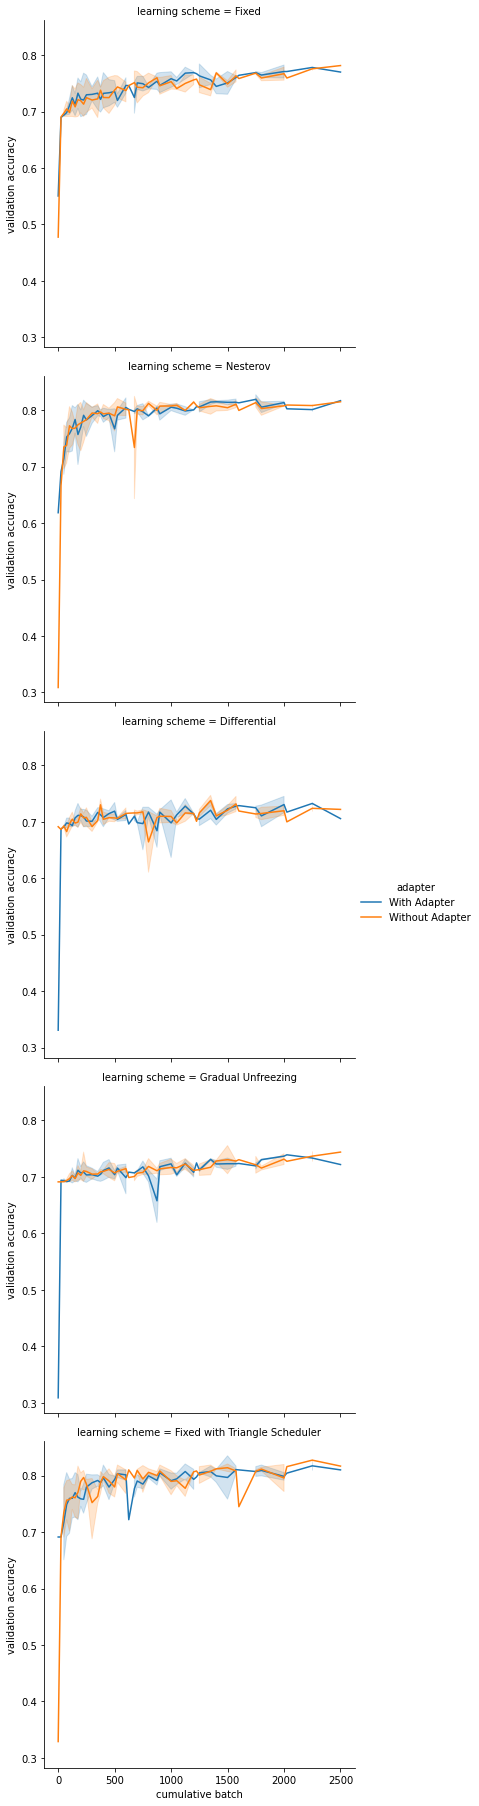

In [19]:
sns.relplot(data=df_cola_batch_data, x='cumulative batch', y='validation accuracy', hue='adapter', row='learning scheme', kind='line')

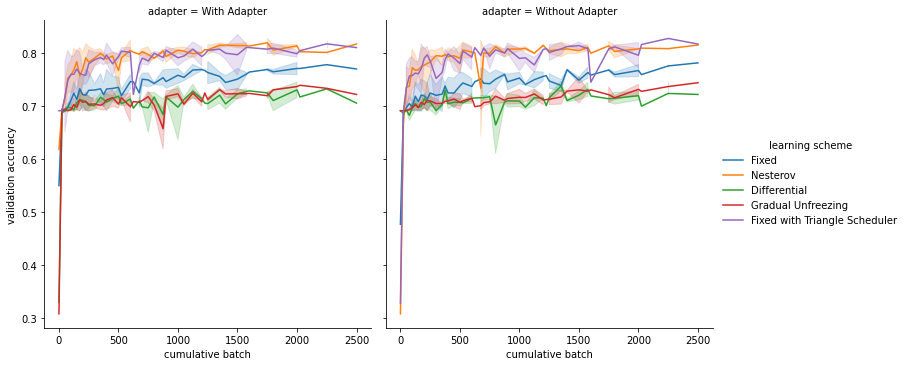

In [20]:
sns.relplot(data=df_cola_batch_data, x='cumulative batch', y='validation accuracy', hue='learning scheme', col='adapter', kind='line')

Text(0.5, 1.0, 'Batch execution time per Learning Scheme with/without Adapters')

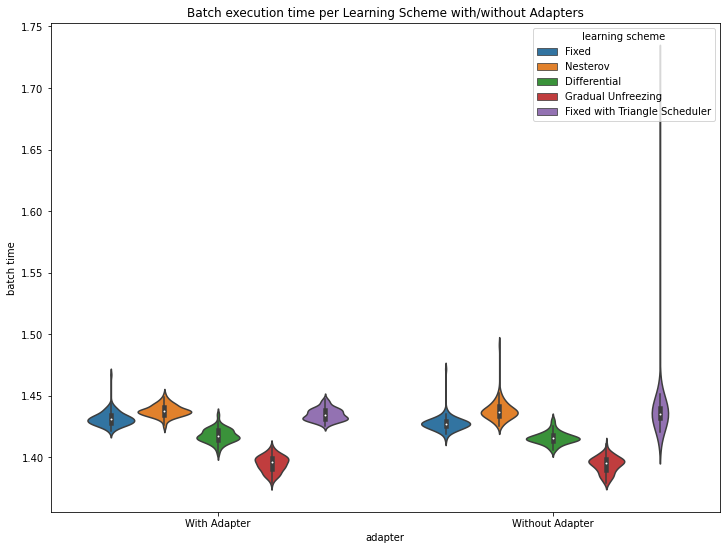

In [21]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(data=df_cola_batch_data[df_cola_batch_data['batch time'] > 0], x='adapter', y='batch time', hue='learning scheme')
plt.title('Batch execution time per Learning Scheme with/without Adapters')

Text(0.5, 1.0, 'Batch execution time per Learning Scheme with/without Adapters')

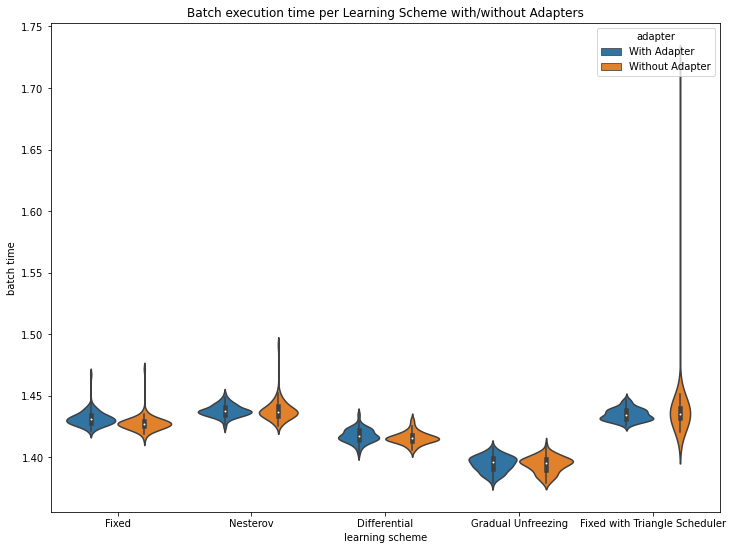

In [22]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(data=df_cola_batch_data[df_cola_batch_data['batch time'] > 0], x='learning scheme', y='batch time', hue='adapter')
plt.title('Batch execution time per Learning Scheme with/without Adapters')

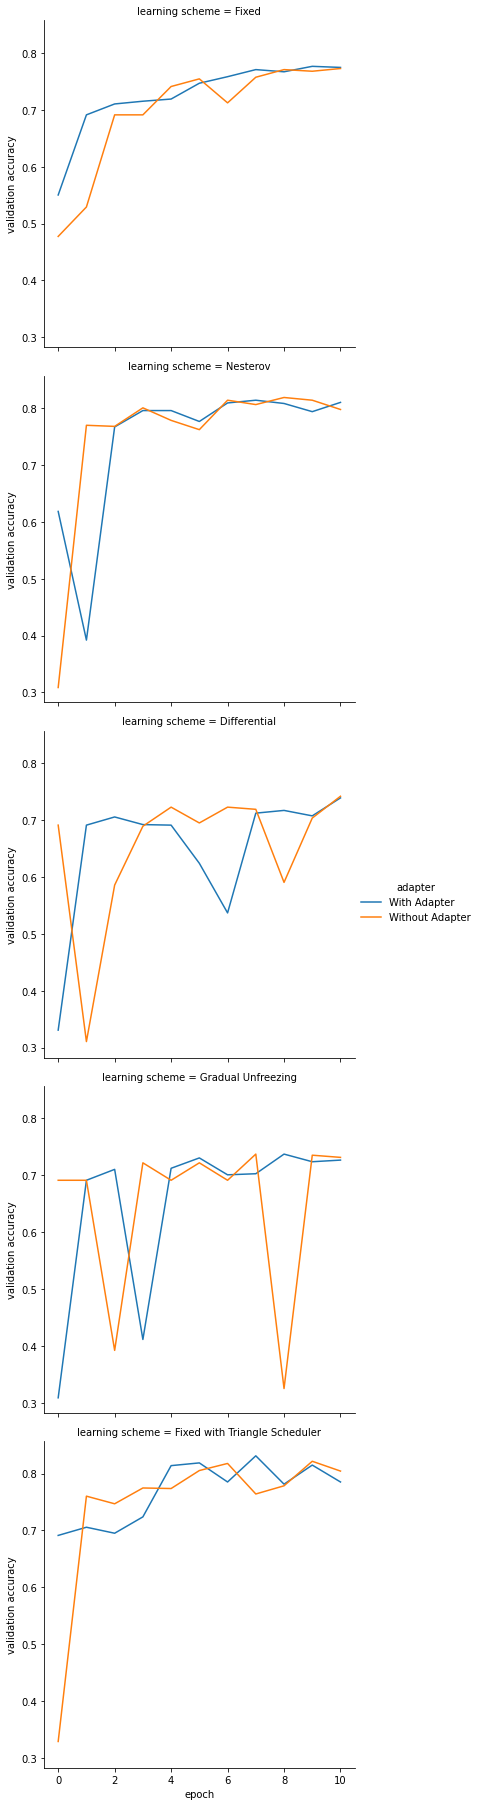

In [25]:
sns.relplot(data=df_cola_epoch_data, x='epoch', y='validation accuracy', hue='adapter', row='learning scheme', kind='line')

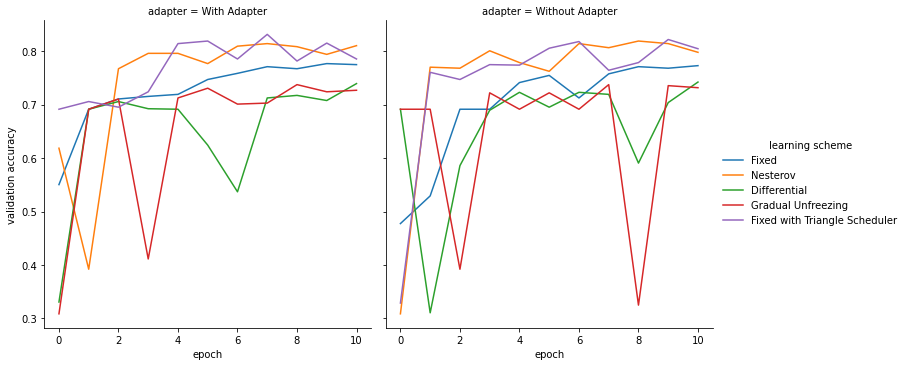

In [26]:
sns.relplot(data=df_cola_epoch_data, x='epoch', y='validation accuracy', hue='learning scheme', col='adapter', kind='line')

Text(0.5, 1.0, 'Epoch execution time per Learning Scheme with/without Adapters')

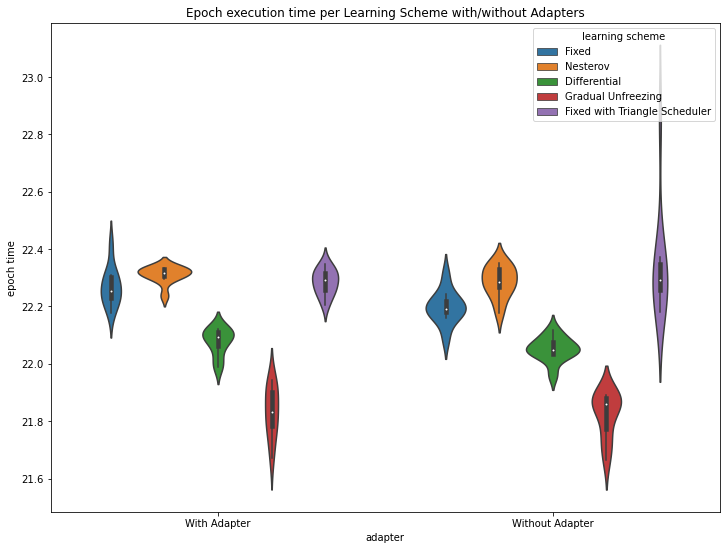

In [27]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(data=df_cola_epoch_data[df_cola_epoch_data['epoch time'] > 0], x='adapter', y='epoch time', hue='learning scheme')
plt.title('Epoch execution time per Learning Scheme with/without Adapters')

Text(0.5, 1.0, 'Epoch execution time per Learning Scheme with/without Adapters')

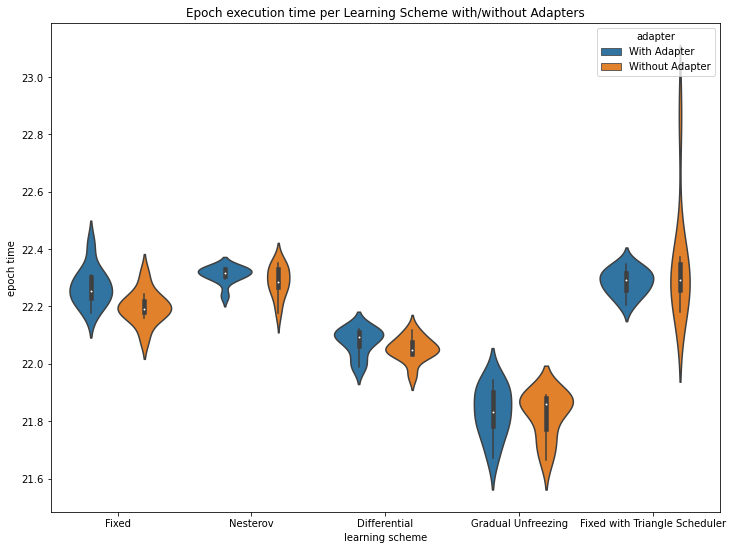

In [28]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.violinplot(data=df_cola_epoch_data[df_cola_epoch_data['epoch time'] > 0], x='learning scheme', y='epoch time', hue='adapter')
plt.title('Epoch execution time per Learning Scheme with/without Adapters')